# Machine Learning II

## 11/12/2024 and 11/14/2024

<a href="?print-pdf">print view</a>  
<a href="Lecture-20-MachineLearning-II.ipynb" download>notebook</a>

## Unsupervised learning: features
## Supervised learning: features + labels

# Unsupervised Learning

Construct a model from unlabeled data.  That is, discover an underlying structure in the data.

We have already looked at
 * Clustering
 * Principal Components Analysis (PCA)
 * t-SNE
 * UMAP
 * Expectation maximization

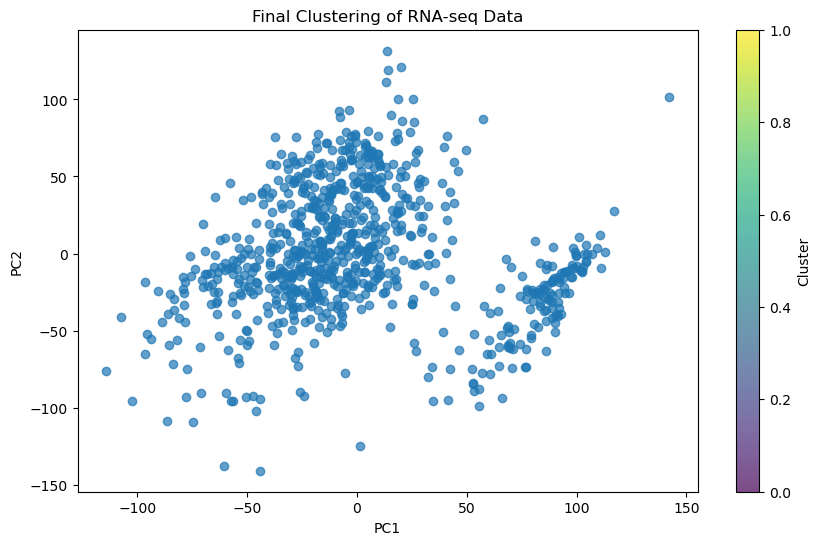

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

# Step 1: Load and preprocess RNA-seq data
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00401/TCGA-PANCAN-HiSeq-801x20531.tar.gz"
data = pd.read_csv(url, compression='gzip', sep=',', header=0,low_memory=False)

# Identify the class column (assuming it's the first column)
class_col = data.columns[0]

# Separate features and labels
X = data.iloc[:, 1:]  # All columns except the first one
y = data[class_col]

# Encode the labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Function to convert to float or NaN
def to_float(x):
    try:
        return float(x)
    except:
        return np.nan

# Convert features to float, replacing any non-convertible values with NaN
X = X.map(to_float)

#Remove the first column due to its awkward behaviour
X = X.iloc[:,1:X.shape[1]]

# Remove any rows with NaN values
X = X.dropna()
y_encoded = y_encoded[X.index]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.7)
plt.title("Final Clustering of RNA-seq Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()

C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(


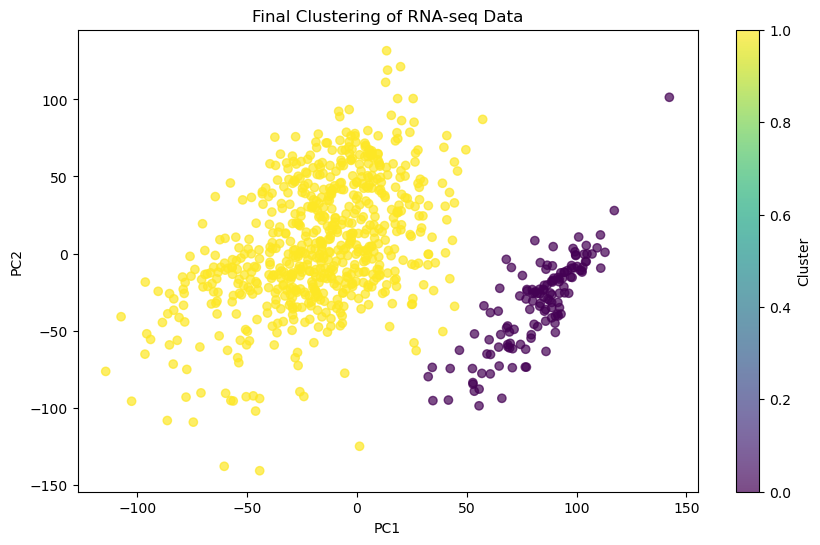

In [90]:
import os
from sklearn.mixture import GaussianMixture
#os.environ['OMP_NUM_THREADS'] = '4';
# Step 3: Apply EM algorithm using GaussianMixture
n_components = 2; #len(np.unique(y_encoded))  # Number of unique cancer types
gmm = GaussianMixture(n_components=n_components,
                          init_params='kmeans',max_iter=3)
gmm.fit(X_pca)
#plot_em_step(X_pca, gmm, i+1)

# Final clustering results
labels2 = gmm.predict(X_pca)

# Visualize final clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels2, cmap='viridis', alpha=0.7)
plt.title("Final Clustering of RNA-seq Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()

**It worked! Interestingly with only a few iterations... Why?**

### K-Means is a modified form of EM algorithm

**Lloyd algorithm**

_E-step_: 
- (EM) Compute the expected value (soft assignment) of the “membership weight” of data point $\underline{x}_{i}$ in
component $k$ given the data and current estimate of the parameter value ($\theta$)
- (K-means) Assign membership (hard assignment) of data point $\underline{x}_{i}$ to the centroid such that it is assigned to the most likely cluster.

_M-step_:
- (EM) Compute the new parameter values ($\theta$ and $\alpha_{k}$) given the membership weights that maximize the expected log-likelihood given by $\alpha_{k}$.
- (K-means) Compute the new paramater value. That is, the new value of centroid.
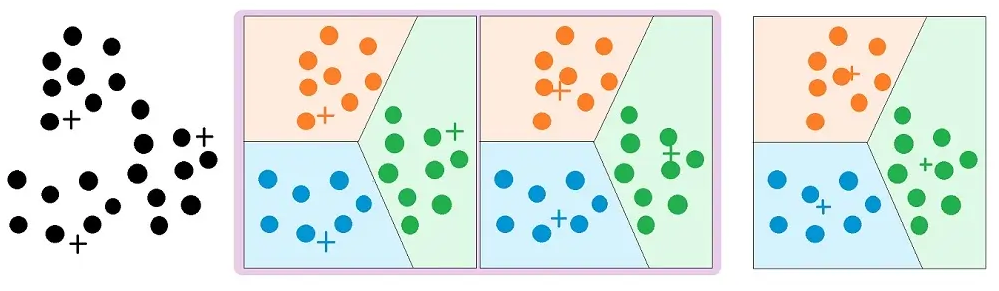

C:\Users\shikh\anaconda3\envs\mscbio2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


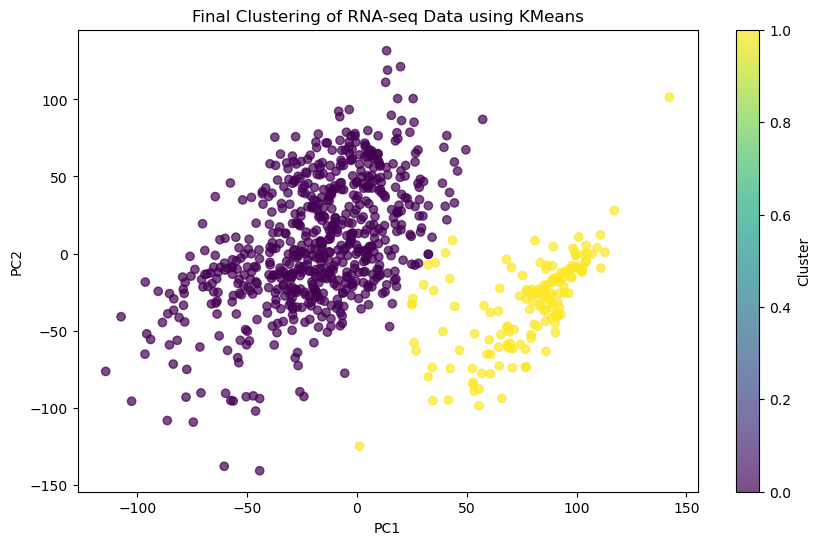

In [17]:
from sklearn.cluster import KMeans

n_clusters = 2  # Number of clusters (previously n_components)

# Create and fit KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=20, init='k-means++')#10
kmeans.fit(X_pca)

# Final clustering results
labels = kmeans.predict(X_pca)

# Visualize final clustering
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.title("Final Clustering of RNA-seq Data using KMeans")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Cluster")
plt.show()


# Supervised Learning

Create a model from labeled data. The data consists of a set of *examples* where each example has a number of features *X* and a label *y*.

Our assumption is that the label is a function of the features:
$$y = f(X)$$  
And our goal is to determine what f is. 
We want a model/estimator/classifier that accurately predicts *y* given an _X_.
<div style="text-align: center; font-size: 150%">$X \rightarrow$<div style="display: inline-block; background-color: black; width: em; color: white; font-size: 120%; padding: 1em; font-weight: bold">Model</div>$ \rightarrow y$</div>


# Labels

There are two main types of supervised learning depending on the type of label.

## Classification

The label is one of a limited number of classes.
Most commonly it is a binary label.
 * Will it rain tomorrow?
 * Is the protein overexpressed?
 * Do the cells die?

## Regression

The label is a continuous value.
 * How much precipitation will there be tomorrow?
 * What is the expression level of the protein?
 * What percent of the cells died?

# Features

The features, *X*, are what make each example distinct.  Ideally they contain enough information to predict _y_.
The choice of features is critical and problem-specific.

There are three main three main types:
 * Binary - zero or one
 * Nominal - one of a limited number of values
   * low, medium, high
   * nucleus, vacuole, cytoplasm
 * Numerical
 
Not all classifiers can handle all three types, but we can inter-convert.


# Example

**Let use an example from Cheminformatics**

*Cheminformatics (also known as chemoinformatics, chemioinformatics and chemical informatics) is the use of computer and informational techniques applied to a range of problems in the field of chemistry.* 
--Wikipedia

# Simplified Molecular Input Line Entry System (SMILES)

**A chemical notation system that allows users to represent a chemical structure in a way that can be used by the computer**

_Cyclohexane_

<img src='http://www.daylight.com/dayhtml/doc/theory/theory4.gif'>

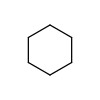

In [92]:
from openbabel import pybel
mol1 = pybel.readstring('smi','C1CCCCC1')
mol1

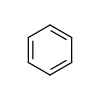

In [35]:
mol2 = pybel.readstring('smi','c1ccccc1')
mol2

## SMILES binary encoding

*process of converting a SMILES string, which represents a molecule's structure, into a binary format using a specific set of rules, essentially translating the characters of a SMILES string into a sequence of bits (0s and 1s) that can be easily processed by computers, particularly in machine learning applications related to molecule analysis and prediction.*


In [95]:
import wget
wget.download("http://mscbio2025.csb.pitt.edu/files/er.smi")

100% [..............................................................................] 20022 / 20022

'er.smi'

In [94]:
from openbabel import pybel
for mol in pybel.readfile('smi','er.smi'):
    print(mol)

c1cc(ccc1c1c(c(ccc1)C(F)(F)F)Cl)O	-0.878

c1cc(c(c2c1c1c(c(=O)o2)cc(c(c1)Br)OC)C)O	-2.114

c1c2c(c3c(c1)C1=C(C(=O)CC[C@]1(C3(O)O)CCCC)C(F)(F)F)cn[nH]2	1.648

c1c(ccc(c1)c1cc(c(cc1)/C=N/O)F)O	-1.029

c1c(cc(c2c1nc(o2)c1ccc(cc1)O)C(C)C)O	-1.165

c1c(cc(c2c1c1c(o2)c(=O)c2c(o1)cc(cc2O)O)C#N)O	-0.063

c1cc(ccc1c1c(c(c(cc1)C=O)Cl)Cl)O	-1.524

c1c(ccc2c1S[C@@H]([C@@H](O2)c1ccc(cc1)OCCN1CCCCC1)CC(C)C)O	1.103

c1c(cc2c(c1)c(no2)c1c(cc(c(c1)CCC)O)CC)O	-0.558

c1c2c(c3c(c1)C1=C(C(=O)CC[C@]1(C3)[C@@H]1C[C@H]1CC)Br)cn[nH]2	2.156

c1(c(cc(c2c1cc(o2)c1ccc(cc1)O)OC)O)Br	-1.623

c1cc(c(c2c1-c1c(CO2)cc(cc1C)O)C)O	-1.144

c1(ccc(cc1)c1cc(c2c(n1)ccc(c2)O)C#C)O	-1.301

c1c(cc2c(c1)c(no2)c1c(cccc1)O)O	-1.072

c1c(ccc2c1nc(o2)c1cc2c(cc1)cc(cc2)O)O	-0.863

c1c2c(c3c(c1)C1=C(C(=O)CC[C@]1(C3(O)O)CC)Cl)cn[nH]2	1.53

c1cc(c(c2c1c1c(c(=O)o2)c(c(cc1)OC)C)C)O	-0.932

c1cc2c(cc1)c(no2)c1c2c(ccc1)cc(cc2)O	-0.46

c1cc(ccc1c1cc(c(cc1)N(C)C)C(F)(F)F)O	-0.535

c1(cc(cc2c1S[C@H]([C@H](O2)c1ccc(cc1)OCCN1CCCCC1)c1ccc(cc1)O)O

In [96]:
from openbabel import pybel
yvals = []
fps = []
for mol in pybel.readfile('smi','er.smi'):
    yvals.append(float(mol.title)) # property (solubility)
    fpbits = mol.calcfp().bits #Compute fingerprints
    fp = np.zeros(1024) #Convert fingerprint bits into an array of size 1024 of zeroes and ones
    fp[fpbits] = 1
    fps.append(fp)
    
X = np.array(fps)
y = np.array(yvals)

In [97]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [98]:
print(X.shape)

(387, 1024)


In [45]:
print(y)

[-0.878 -2.114  1.648 -1.029 -1.165 -0.063 -1.524  1.103 -0.558  2.156
 -1.623 -1.144 -1.301 -1.072 -0.863  1.53  -0.932 -0.46  -0.535 -0.54
 -0.957 -0.852 -0.079 -1.206  0.109 -1.067 -1.198  1.73  -0.253 -1.535
 -1.352  1.011 -1.448 -1.499 -1.232 -1.65  -1.392 -0.941  2.112 -1.809
 -0.905 -1.435  2.651 -0.786 -0.372 -1.256  0.802 -2.013 -1.851 -0.575
 -0.165 -3.    -1.17  -1.108 -1.436 -1.421 -1.396  2.465 -0.8   -1.434
 -1.217 -0.544  2.255 -1.32  -0.903  1.664 -1.009 -0.951 -0.495 -1.185
 -0.616 -1.895 -1.399 -1.923  1.786  0.079  1.786 -1.079 -1.457 -1.742
 -1.996 -1.467 -1.467 -1.052 -1.244 -1.285 -1.434 -0.662 -1.616 -1.304
 -0.993 -0.893  0.76  -0.975  1.602  1.602 -0.725 -1.222 -1.379  1.255
  1.093 -1.61  -1.068 -1.131 -1.153 -1.176 -1.176  1.76  -2.019 -1.466
 -1.539 -1.486 -1.144  0.681 -0.813  1.973  2.255 -1.088  1.114 -0.996
 -1.719 -1.385 -1.385 -2.005  1.591  1.631 -1.836 -2.146 -1.073 -0.368
 -1.554 -0.984 -1.179 -0.873 -1.861 -1.861  2.649  2.187 -0.836 -1.871
 -1.015

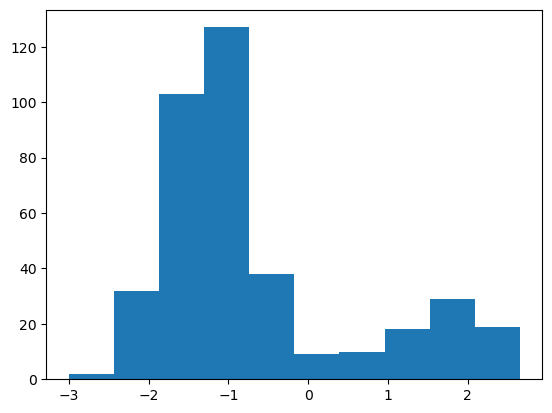

In [66]:
plt.hist(y);

# Linear Model

One of the simplest models is a linear regression, where the goal is to find weights *w* to minimize:
$$\sum(Xw - y)^2$$

<table>
<tr>
<td>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png"></td><td>
<img src="http://fab.cba.mit.edu/classes/864.11/people/Moritz_Kassner/img/blue_plane.png"></td></tr>
</table>

In [106]:
from sklearn import linear_model
model = linear_model.LinearRegression() # create the model
model.fit(X,y) # fit the model to the data
p = model.predict(X) # make predictions with the model

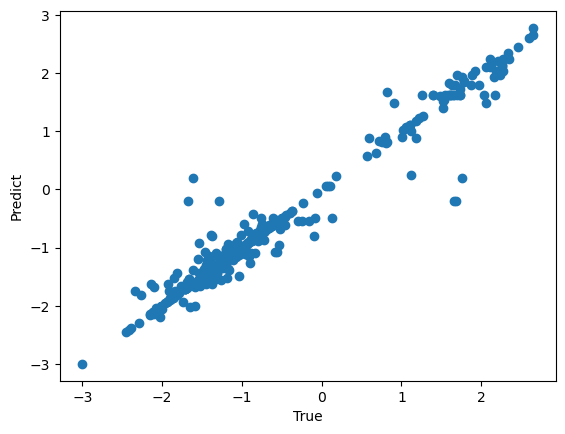

In [107]:
plt.scatter(y,p); plt.xlabel('True'); plt.ylabel('Predict');

**Let's reframe this is as a classification problem**

In [108]:
ylabel = y > -1
plabel = p > -1

# Evaluating Predictions

There are a number of ways to evaluate how good a prediction is.
 * *TP* true positive, a correctly predicted positive example
 * *TN*  true negatie, a correctly predicted negative example
 * *FP* false positive, a negative example incorrectly predicted as positive
 * *FN* false negative, a positive example incorrectly predicted as negative
 * *P* total number of positives (*TP* + *FN*)
 * *N* total number of negatives (*TN* + *FP*)

Accuracy: $\frac{TP+TN}{P+N}$

In [99]:
from sklearn.metrics import * #pull in accuracy score, among other things
accuracy_score(ylabel, plabel)

0.9431524547803618

# Confusion matrix

The confusion matrix compares the predicted class to the actual class.

In [103]:
print(np.array([['TN', 'FP'],['FN','TP']]))

[['TN' 'FP']
 ['FN' 'TP']]


In [102]:
print(confusion_matrix(ylabel,plabel))

[[200  12]
 [ 10 165]]


# Other measures

Precision. Of those predicted true, how may are accurate? $\frac{TP}{TP+FP}$

Recall (true positive rate). How many of the true examples were retrieved? $\frac{TP}{P}$

F1 Score. The geometric mean of precision and recall. $\frac{2TP}{2TP+FP+FN}$

# ROC Curves

The previous metrics work on classification results (yes or no).  Many models are capable of producing scores or probabilities (recall we had to threshold our results).  The classification performance then depends on what score threshold is chosen to distinguish the two classes.

ROC curves plot the false positive rate and true positive rate as this treshold is changed.

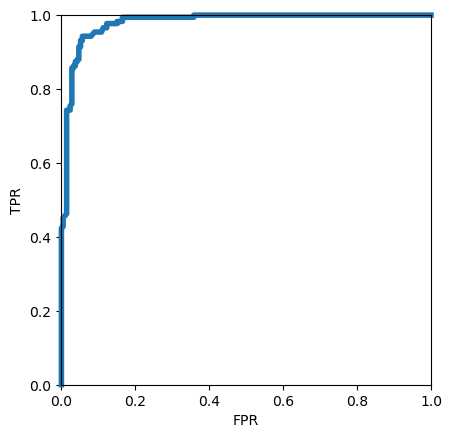

In [110]:
fpr, tpr, thresholds = roc_curve(ylabel, p)  #not using rounded values
plt.plot(fpr,tpr,linewidth=4,clip_on=False)
plt.xlabel("FPR"); plt.ylabel("TPR")
plt.gca().set_aspect('equal')
plt.ylim(0,1); plt.xlim(0,1); plt.show()

# AUC

The area under the ROC curve (AUC) has a statistical meaning. It is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

An AUC of one is perfect prediction.

An AUC of 0.5 is the same as random.

0.5058086253369272


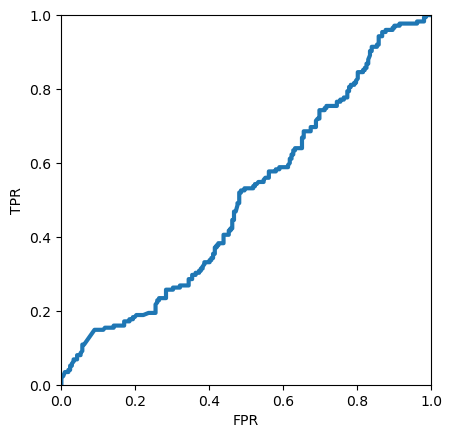

In [111]:
np.random.shuffle(p)
fpr, tpr, thresholds = roc_curve(ylabel, p)  
plt.plot(fpr,tpr,linewidth=3); plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1)
plt.gca().set_aspect('equal')

print(roc_auc_score(ylabel,p))

# Correct Model Evaluation

We are most interested in *generalization error*: the ability of the model to predict **new** data that was not part of the training set.

We have been evaluating how well our model can fit the training data.  This is usually irrelevant.

In order to assess the *predictiveness* of the model, we must use it to predict data it has not been trained on.

# Cross Validation

In cross validation we train on a portion of the data and test on the remainder.

### K-Fold Cross Validation
 * split data into *k* parts, or folds
 * train *k* models, each using a different set of k-1 folds
 * evaluate on held out set
 
 If k == n, called leave-one-out cross validation.
 
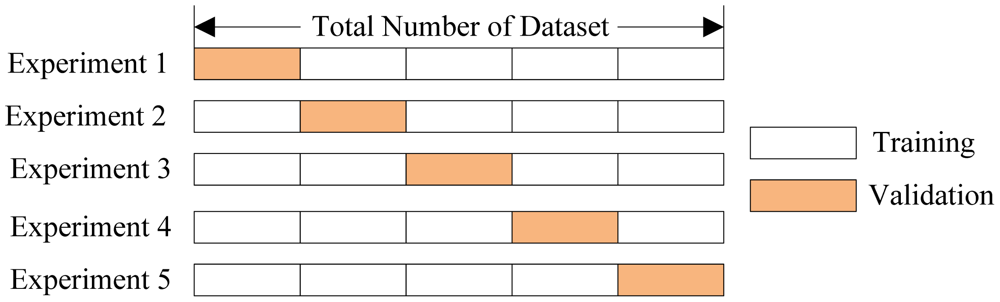

# Cross Validation

`sklearn` implement a number of cross validation variants.  They provide a way to generate test/train sets.

In [112]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = linear_model.LinearRegression() 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) #slice out the test fold
    accuracies.append(accuracy_score(ylabel[test],p > -1))
    fpr, tpr, thresholds = roc_curve(ylabel[test], p)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test], p)))

In [113]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6282051282051282, 0.6666666666666666, 0.5974025974025974, 0.6493506493506493, 0.6883116883116883]
Average accuracy: 0.645987345987346


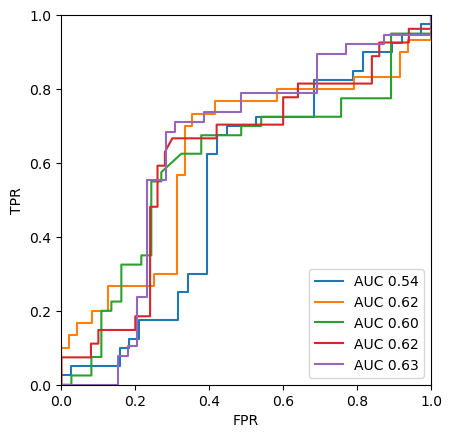

In [115]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

# Generalization Error

There are several sources of generalization error:
 * overfitting - using artifacts of the data to make predictions
   * our data set has 387 examples and 1024 features
 * insufficient data - not enough or not the right kind
 * inappropriate model - isn't capable of representing reality
 
A large different between cross-validation performance and fit (test-on-train) performance indicates overfitting.

One way to reduce overfitting is to reduce the number of features used for training (this is called *feature selection*).

# LASSO

Lasso is a modified form of linear regression that includes a *regularization* parameter $\alpha$
$$\sum(Xw - y)^2 + \alpha\sum|w|$$

The higher the value of $\alpha$, the greater the penalty for having non-zero weights.  This has the effect of driving weights to zero and selecting fewer features for the model.


In [116]:
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = linear_model.Lasso(alpha=0.005) 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) #slice out the test fold
    accuracies.append(accuracy_score(ylabel[test],p > 0))
    fpr, tpr, thresholds = roc_curve(ylabel[test], p)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],p)))

In [117]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6666666666666666, 0.7948717948717948, 0.6493506493506493, 0.8051948051948052, 0.7402597402597403]
Average accuracy: 0.7312687312687312


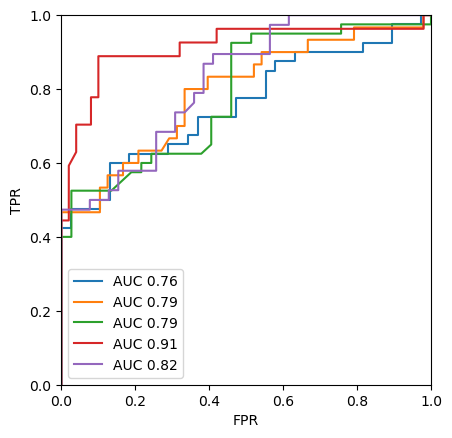

In [118]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

# Lasso vs. LinearRegression

In [121]:
linmodel = linear_model.LinearRegression() 
linmodel.fit(X,y) 
lassomodel = linear_model.Lasso(alpha=0.005) 
lassomodel.fit(X,y);

The Lasso model is much simpler

In [122]:
print("Nonzero coefficients in linear:",np.count_nonzero(linmodel.coef_))
print("Nonzero coefficients in LASSO:",np.count_nonzero(lassomodel.coef_))

Nonzero coefficients in linear: 881
Nonzero coefficients in LASSO: 64


# Model Parameter Optimization

Most classifiers have parameters, like $\alpha$ in Lasso, that can be set to change the classification behavior.

A key part of training a model is figuring out what parameters to use.

This is typically done by a brute-force grid search (i.e., try a bunch of values and see which ones work)

In [123]:
from sklearn import model_selection
#setup grid search with default 5-fold CV and scoring
searcher = model_selection.GridSearchCV(linear_model.Lasso(max_iter=10000), {'alpha': [0.001,0.005,0.01,0.1]})
searcher.fit(X,y)
searcher.best_params_

{'alpha': 0.005}

# Model specific optimization

Some classifiers (mostly linear models) can identify optimal parameters more efficiently and have a "CV" version that automatically determines the best parameters.

In [74]:
lassomodel = linear_model.LassoCV(n_jobs=8,max_iter=10000)
lassomodel.fit(X,y)

LassoCV(max_iter=10000, n_jobs=8)

In [75]:
lassomodel.alpha_

0.00455203947849711

# Support Vector Machine (SVM)

A support vector machine is orthogonal to a linear model - it attempts to find a plane that *separates* the classes of data with the maximum *margin*.

<img  src="http://docs.opencv.org/2.4/_images/optimal-hyperplane.png">

There are two key parameters in an SVM: the kernel and the penalty term (and some kernels may have additional parameters).

# SVM Kernels

A kernel function, $\phi$, is a transformation of the input data that let's us apply SVM (linear separation) to problems that are not linearly separable.

<img src="http://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png">

# Training SVM

We can get both the *predictions* (0 or 1) from the SVM as well as *probabilities*, a confidence in how accurate the predictions are.  We use the probabilities to compute the ROC curve.

In [76]:
from sklearn import svm
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = svm.SVC(probability=True) 
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

In [77]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.6923076923076923, 0.7307692307692307, 0.6883116883116883, 0.7922077922077922, 0.6753246753246753]
Average accuracy: 0.7157842157842158


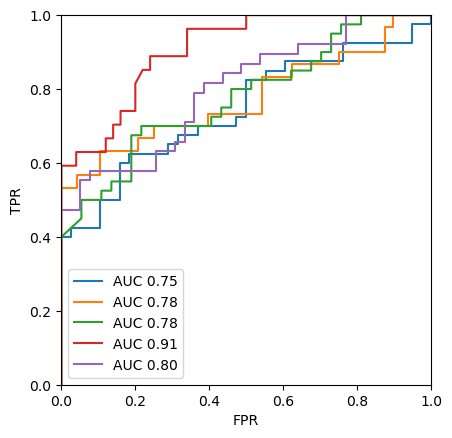

In [78]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [80]:
from sklearn import model_selection
searcher = model_selection.GridSearchCV(svm.SVC(), {'kernel': ['linear','rbf'],'C': [1,10,100,1000]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'kernel': ['linear', 'rbf']},
             scoring='roc_auc')

In [81]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.8149612403100776
Parameters {'C': 10, 'kernel': 'rbf'}


# Nearest Neighbors (NN)

Nearest Neighbors models classify new points based on the values of the closest points in the training set.

<img width="400" src="http://scikit-learn.org/stable/_images/sphx_glr_plot_classification_001.png">

The main parameter is $k$, the number of neighbors to consider, and the method of combining the neighbor results.

# Training NN

In [124]:
from sklearn import neighbors
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = neighbors.KNeighborsClassifier() # defaults to k=5
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

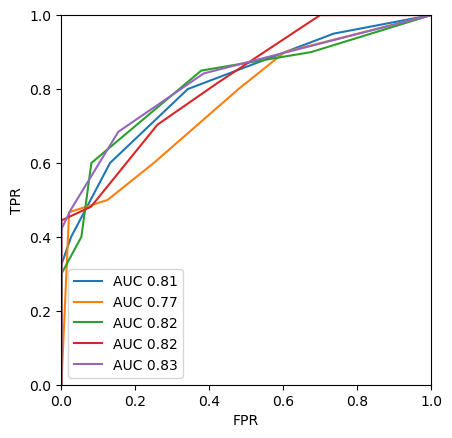

In [125]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [126]:
searcher = model_selection.GridSearchCV(neighbors.KNeighborsClassifier(), \
                {'n_neighbors': [1,2,3,4,5,10]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel);

In [127]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.8024758740705586
Parameters {'n_neighbors': 5}


# Decision Trees

A decision tree is a tree where each node make a decision based on the value of a single feature.  At the bottom of the tree is the classification that results from all those decisions.

<img width="500px" src="http://www.massgenomics.org/wp-content/uploads/2008/10/decision_tree_model.png">

Significant model parameters include the depth of the tree and how features and splits are determined.

# Random Forest

A bunch of decision trees trained on different sub-samples of the data.

They vote (or are averaged).

# Training a Decision Tree

In [129]:
from sklearn import tree
kf = KFold(n_splits=5)
accuracies = []; rocs = []
for train,test in kf.split(X): # these are arrays of indices
    model = tree.DecisionTreeClassifier() 
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocs.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

In [130]:
print(accuracies)
print("Average accuracy:",np.mean(accuracies))

[0.7692307692307693, 0.7435897435897436, 0.7142857142857143, 0.7532467532467533, 0.7142857142857143]
Average accuracy: 0.738927738927739


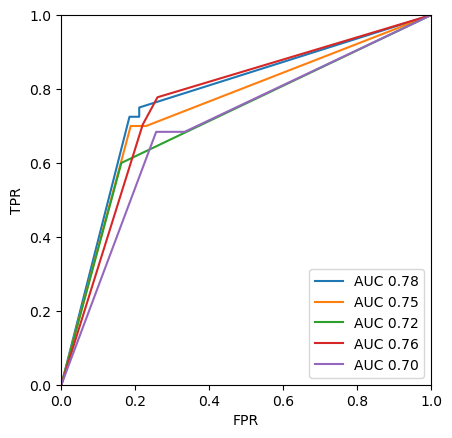

In [131]:
for roc in rocs:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [133]:
searcher = model_selection.GridSearchCV(tree.DecisionTreeClassifier(),  \
                {'max_depth': [1,2,3,4,5,10]},scoring='roc_auc',n_jobs=-1)
searcher.fit(X,ylabel);

In [134]:
print("Best AUC:",searcher.best_score_)
print("Parameters",searcher.best_params_)

Best AUC: 0.7716753678215473
Parameters {'max_depth': 5}


In [135]:
model = tree.DecisionTreeClassifier(max_depth=5).fit(X,ylabel)
set(model.predict_proba(X)[:,1])

{0.0,
 0.046153846153846156,
 0.15217391304347827,
 0.2391304347826087,
 0.5,
 0.6666666666666666,
 1.0}

In [143]:
from sklearn.model_selection import KFold
from sklearn import ensemble
kf = KFold(n_splits=5)
accuracies = []; rocsRF = []
for train,test in kf.split(X): # these are arrays of indices
    model = ensemble.RandomForestClassifier() 
    model.fit(X[train],ylabel[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    probs = model.predict_proba(X[test])[:,1] #probability of being 1
    accuracies.append(accuracy_score(ylabel[test],p))
    fpr, tpr, thresholds = roc_curve(ylabel[test], probs)  
    rocsRF.append( (fpr,tpr, roc_auc_score(ylabel[test],probs)))

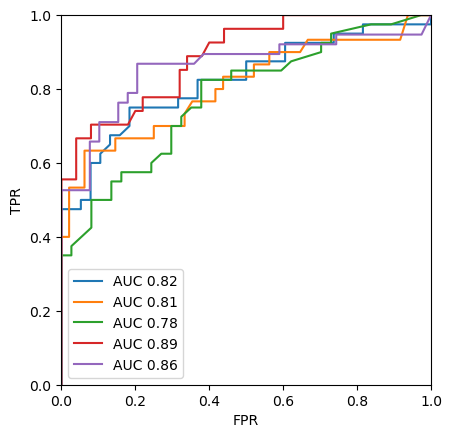

In [144]:
for roc in rocsRF:
    plt.plot(roc[0],roc[1],label="AUC %.2f" %roc[2]); 
plt.gca().set_aspect('equal')    
plt.xlabel("FPR"); plt.ylabel("TPR"); plt.ylim(0,1); plt.xlim(0,1); plt.legend(loc='best'); plt.show()

In [145]:
from sklearn.metrics import *
from sklearn import ensemble
kf = KFold(n_splits=5)
errors = []; predictions = []
for train,test in kf.split(X): # these are arrays of indices
    model = ensemble.RandomForestRegressor() 
    model.fit(X[train],y[train]) #slice out the training folds
    p = model.predict(X[test]) # prediction (0 or 1)
    predictions += zip(y[test],p)
    errors.append(mean_squared_error(y[test],p))
predictions = np.array(predictions)

In [146]:
print(errors)
print("Average squared error",np.mean(errors))

[0.28245615300794913, 0.3510499297177833, 0.19296091615256686, 0.37789406928103264, 0.2128236668880173]
Average squared error 0.28343694700946986
